In [1]:
import glob
import pandas as pd

In [2]:
import librosa

In [3]:
path = 'C:/Users/Pritam/Downloads/Bangla voice'
all_files = glob.glob(path + "/*.wav")

In [4]:
all_files

['C:/Users/Pritam/Downloads/Bangla voice\\01-01-04-02-03-01-15.wav',
 'C:/Users/Pritam/Downloads/Bangla voice\\01-01-04-02-03-02-15.wav',
 'C:/Users/Pritam/Downloads/Bangla voice\\01-01-04-02-03-03-15.wav',
 'C:/Users/Pritam/Downloads/Bangla voice\\03-01-01-01-01-01-01.wav',
 'C:/Users/Pritam/Downloads/Bangla voice\\03-01-01-01-01-01-02.wav',
 'C:/Users/Pritam/Downloads/Bangla voice\\03-01-01-01-01-01-03.wav',
 'C:/Users/Pritam/Downloads/Bangla voice\\03-01-01-01-01-01-04.wav',
 'C:/Users/Pritam/Downloads/Bangla voice\\03-01-01-01-01-01-05.wav',
 'C:/Users/Pritam/Downloads/Bangla voice\\03-01-01-01-01-01-06.wav',
 'C:/Users/Pritam/Downloads/Bangla voice\\03-01-01-01-01-01-07.wav',
 'C:/Users/Pritam/Downloads/Bangla voice\\03-01-01-01-01-01-08.wav',
 'C:/Users/Pritam/Downloads/Bangla voice\\03-01-01-01-01-01-09.wav',
 'C:/Users/Pritam/Downloads/Bangla voice\\03-01-01-01-01-01-10.wav',
 'C:/Users/Pritam/Downloads/Bangla voice\\03-01-01-01-01-01-11.wav',
 'C:/Users/Pritam/Downloads/Bangla

In [5]:
all_files[0]

'C:/Users/Pritam/Downloads/Bangla voice\\01-01-04-02-03-01-15.wav'

In [6]:
type(all_files)

list

In [7]:
files_1 = [i.split('/')[4] for i in all_files]
files_2 = [i.split('\\')[1] for i in files_1]
files_3 = pd.Series([i.split('-')[2] for i in files_2])

In [9]:
df = pd.DataFrame(files_2, columns=['Audio data'])
df

,Audio data
0,01-01-04-02-03-01-15.wav
1,01-01-04-02-03-02-15.wav
2,01-01-04-02-03-03-15.wav
3,03-01-01-01-01-01-01.wav
4,03-01-01-01-01-01-02.wav
...,...
1461,03-01-05-01-03-03-30.wav
1462,03-01-05-01-03-03-31.wav
1463,03-01-05-01-03-03-32.wav
1464,03-01-05-01-03-03-33.wav


In [10]:
files_4 = pd.Series([i.split('-')[0] for i in files_2])
files_5 = pd.Series([i.split('-')[1] for i in files_2])
files_6 = pd.Series([i.split('-')[3] for i in files_2])
files_7 = pd.Series([i.split('-')[4] for i in files_2])
files_8 = pd.Series([i.split('-')[5] for i in files_2])
files_9 = pd.Series([i.split('-')[6] for i in files_2])
files_10 = pd.Series([i.split('.wav')[0] for i in files_9])

In [11]:
df['Audio only'] = files_4.values
df['Statement type'] = files_5.values
df['Emotion intensity'] = files_6.values
df[' Statement number'] = files_7.values
df['Repetition'] = files_8.values
df['Actor_No'] = files_10.values
df['Emotion'] = files_3.values
df

,Audio data,Audio only,Statement type,Emotion intensity,Statement number,Repetition,Actor_No,Emotion
0,01-01-04-02-03-01-15.wav,01,01,02,03,01,15,04
1,01-01-04-02-03-02-15.wav,01,01,02,03,02,15,04
2,01-01-04-02-03-03-15.wav,01,01,02,03,03,15,04
3,03-01-01-01-01-01-01.wav,03,01,01,01,01,01,01
4,03-01-01-01-01-01-02.wav,03,01,01,01,01,02,01
...,...,...,...,...,...,...,...,...
1461,03-01-05-01-03-03-30.wav,03,01,01,03,03,30,05
1462,03-01-05-01-03-03-31.wav,03,01,01,03,03,31,05
1463,03-01-05-01-03-03-32.wav,03,01,01,03,03,32,05
1464,03-01-05-01-03-03-33.wav,03,01,01,03,03,33,05


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1466 entries, 0 to 1465
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Audio data         1466 non-null   object
 1   Audio only         1466 non-null   object
 2   Statement type     1466 non-null   object
 3   Emotion intensity  1466 non-null   object
 4    Statement number  1466 non-null   object
 5   Repetition         1466 non-null   object
 6   Actor_No           1466 non-null   object
 7   Emotion            1466 non-null   object
dtypes: object(8)
memory usage: 91.8+ KB


In [13]:
import pandas as pd

# Assuming you have a dataset named 'df' and you want to typecast the column 'column_name' from object to integer
df['Emotion'] = df['Emotion'].astype(int)

In [14]:
audio_dataset_path='C:/Users/Pritam/Downloads/Bangla voice'

In [22]:
def features_extractor_2(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    chroma_vqt_features = librosa.feature.chroma_cqt(y=audio, sr=sample_rate)
    chroma_vqt_scaled_features = np.mean(chroma_vqt_features.T,axis=0)
    
    return chroma_vqt_scaled_features

In [23]:
pip install resampy

Note: you may need to restart the kernel to use updated packages.


In [24]:
import os
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(df.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path)+'/',str(row["Audio data"]))
    final_class_labels=row["Emotion"]
    data=features_extractor_2(file_name)#I have not written this function
    extracted_features.append([data,final_class_labels])

683it [01:39,  8.09it/s]C:\Users\Pritam\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=904
  warnings.warn(
1466it [03:27,  7.06it/s]


In [25]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[0.40809813, 0.35223117, 0.5779394, 0.85271525...",4
1,"[0.26905182, 0.36914104, 0.85056007, 0.4756824...",4
2,"[0.32302868, 0.4011936, 0.88901776, 0.48778126...",4
3,"[0.48038062, 0.48929006, 0.47455248, 0.4665374...",1
4,"[0.44535717, 0.48026776, 0.6818383, 0.56180775...",1


In [26]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.tail()

,feature,class
1461,"[0.57723, 0.5337922, 0.46630177, 0.5059791, 0....",5
1462,"[0.6740768, 0.73823553, 0.67312723, 0.46579424...",5
1463,"[0.51494884, 0.47933418, 0.41978276, 0.4388021...",5
1464,"[0.48157623, 0.4145634, 0.75864965, 0.6876703,...",5
1465,"[0.7713454, 0.49259382, 0.45574385, 0.46549457...",5


In [27]:
extracted_features_df.feature[0]

array([0.40809813, 0.35223117, 0.5779394 , 0.85271525, 0.44828022,
       0.561614  , 0.41457507, 0.49083304, 0.5559366 , 0.31284148,
       0.36157793, 0.5372303 ], dtype=float32)

In [28]:
extracted_features_df.feature[0].shape

(12,)

In [29]:
extracted_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1466 entries, 0 to 1465
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   feature  1466 non-null   object
 1   class    1466 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 23.0+ KB


In [30]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [31]:
X

array([[0.40809813, 0.35223117, 0.5779394 , ..., 0.31284148, 0.36157793,
        0.5372303 ],
       [0.26905182, 0.36914104, 0.85056007, ..., 0.34045392, 0.33431366,
        0.5760624 ],
       [0.32302868, 0.4011936 , 0.88901776, ..., 0.30375272, 0.29436523,
        0.5699112 ],
       ...,
       [0.51494884, 0.47933418, 0.41978276, ..., 0.7704025 , 0.72383356,
        0.5617182 ],
       [0.48157623, 0.4145634 , 0.75864965, ..., 0.3289346 , 0.3538476 ,
        0.5513108 ],
       [0.7713454 , 0.49259382, 0.45574385, ..., 0.39340243, 0.5779231 ,
        0.5469532 ]], dtype=float32)

In [32]:
y

array([4, 4, 4, ..., 5, 5, 5])

In [33]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install keras.utils

Note: you may need to restart the kernel to use updated packages.


In [35]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [36]:
y

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [38]:
X_train.shape

(1172, 12)

In [39]:
X_test.shape

(294, 12)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn import metrics

In [41]:
y.shape[1]

5

In [42]:
num_labels=y.shape[1]

In [43]:
model=Sequential()
###first layer
model.add(Dense(200,input_shape=(12,)))
model.add(Activation('sigmoid'))
#model.add(Dropout(0.2))
###second layer
model.add(Dense(200))
model.add(Activation('sigmoid'))
#model.add(Dropout(0.2))
###third layer
model.add(Dense(200))
model.add(Activation('sigmoid'))
#model.add(Dropout(0.2))

model.add(Dense(200))
model.add(Activation('sigmoid'))
#model.add(Dropout(0.2))

model.add(Dense(200))
model.add(Activation('sigmoid'))
#model.add(Dropout(0.2))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               2600      
                                                                 
 activation (Activation)     (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 activation_2 (Activation)   (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 200)               4

In [48]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy', 'mean_squared_error'],optimizer='Nadam')

In [53]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 500
num_batch_size = 4

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/500
281/293 [===========================>..] - ETA: 0s - loss: 1.5549 - accuracy: 0.2945 - mean_squared_error: 0.1561
Epoch 1: val_loss improved from inf to 1.54372, saving model to saved_models\audio_classification.hdf5
293/293 [==============================] - 1s 2ms/step - loss: 1.5543 - accuracy: 0.2944 - mean_squared_error: 0.1561 - val_loss: 1.5437 - val_accuracy: 0.2755 - val_mean_squared_error: 0.1554
Epoch 2/500
285/293 [============================>.] - ETA: 0s - loss: 1.5507 - accuracy: 0.2860 - mean_squared_error: 0.1558
Epoch 2: val_loss did not improve from 1.54372
293/293 [==============================] - 1s 2ms/step - loss: 1.5516 - accuracy: 0.2833 - mean_squared_error: 0.1559 - val_loss: 1.5438 - val_accuracy: 0.2619 - val_mean_squared_error: 0.1556
Epoch 3/500
275/293 [===========================>..] - ETA: 0s - loss: 1.5478 - accuracy: 0.2955 - mean_squared_error: 0.1556
Epoch 3: val_loss improved from 1.54372 to 1.53783, saving model to saved_models\audio

293/293 [==============================] - ETA: 0s - loss: 1.5131 - accuracy: 0.3072 - mean_squared_error: 0.1525
Epoch 21: val_loss improved from 1.51215 to 1.51172, saving model to saved_models\audio_classification.hdf5
293/293 [==============================] - 1s 5ms/step - loss: 1.5131 - accuracy: 0.3072 - mean_squared_error: 0.1525 - val_loss: 1.5117 - val_accuracy: 0.2823 - val_mean_squared_error: 0.1525
Epoch 22/500
290/293 [============================>.] - ETA: 0s - loss: 1.5132 - accuracy: 0.3017 - mean_squared_error: 0.1525
Epoch 22: val_loss did not improve from 1.51172
293/293 [==============================] - 1s 5ms/step - loss: 1.5132 - accuracy: 0.3029 - mean_squared_error: 0.1525 - val_loss: 1.5162 - val_accuracy: 0.3027 - val_mean_squared_error: 0.1527
Epoch 23/500
290/293 [============================>.] - ETA: 0s - loss: 1.5080 - accuracy: 0.3034 - mean_squared_error: 0.1518
Epoch 23: val_loss did not improve from 1.51172
293/293 [==============================] -

290/293 [============================>.] - ETA: 0s - loss: 1.4896 - accuracy: 0.3198 - mean_squared_error: 0.1501
Epoch 42: val_loss did not improve from 1.49872
293/293 [==============================] - 1s 5ms/step - loss: 1.4898 - accuracy: 0.3200 - mean_squared_error: 0.1501 - val_loss: 1.5111 - val_accuracy: 0.2585 - val_mean_squared_error: 0.1525
Epoch 43/500
287/293 [============================>.] - ETA: 0s - loss: 1.4933 - accuracy: 0.3284 - mean_squared_error: 0.1506
Epoch 43: val_loss did not improve from 1.49872
293/293 [==============================] - 1s 5ms/step - loss: 1.4909 - accuracy: 0.3285 - mean_squared_error: 0.1504 - val_loss: 1.5013 - val_accuracy: 0.2959 - val_mean_squared_error: 0.1517
Epoch 44/500
283/293 [===========================>..] - ETA: 0s - loss: 1.4941 - accuracy: 0.3163 - mean_squared_error: 0.1505
Epoch 44: val_loss did not improve from 1.49872
293/293 [==============================] - 1s 5ms/step - loss: 1.4899 - accuracy: 0.3208 - mean_square

Epoch 64/500
283/293 [===========================>..] - ETA: 0s - loss: 1.4799 - accuracy: 0.3542 - mean_squared_error: 0.1491
Epoch 64: val_loss did not improve from 1.48150
293/293 [==============================] - 1s 4ms/step - loss: 1.4816 - accuracy: 0.3524 - mean_squared_error: 0.1493 - val_loss: 1.4908 - val_accuracy: 0.3231 - val_mean_squared_error: 0.1507
Epoch 65/500
288/293 [============================>.] - ETA: 0s - loss: 1.4756 - accuracy: 0.3377 - mean_squared_error: 0.1489
Epoch 65: val_loss did not improve from 1.48150
293/293 [==============================] - 1s 5ms/step - loss: 1.4752 - accuracy: 0.3370 - mean_squared_error: 0.1489 - val_loss: 1.4860 - val_accuracy: 0.3265 - val_mean_squared_error: 0.1504
Epoch 66/500
285/293 [============================>.] - ETA: 0s - loss: 1.4810 - accuracy: 0.3307 - mean_squared_error: 0.1492
Epoch 66: val_loss did not improve from 1.48150
293/293 [==============================] - 1s 5ms/step - loss: 1.4798 - accuracy: 0.3328 

Epoch 86/500
290/293 [============================>.] - ETA: 0s - loss: 1.4671 - accuracy: 0.3336 - mean_squared_error: 0.1479
Epoch 86: val_loss improved from 1.47919 to 1.47288, saving model to saved_models\audio_classification.hdf5
293/293 [==============================] - 1s 4ms/step - loss: 1.4657 - accuracy: 0.3345 - mean_squared_error: 0.1478 - val_loss: 1.4729 - val_accuracy: 0.3265 - val_mean_squared_error: 0.1491
Epoch 87/500
291/293 [============================>.] - ETA: 0s - loss: 1.4632 - accuracy: 0.3445 - mean_squared_error: 0.1477
Epoch 87: val_loss improved from 1.47288 to 1.46734, saving model to saved_models\audio_classification.hdf5
293/293 [==============================] - 1s 5ms/step - loss: 1.4629 - accuracy: 0.3456 - mean_squared_error: 0.1476 - val_loss: 1.4673 - val_accuracy: 0.3333 - val_mean_squared_error: 0.1485
Epoch 88/500
287/293 [============================>.] - ETA: 0s - loss: 1.4660 - accuracy: 0.3389 - mean_squared_error: 0.1478
Epoch 88: val_los

286/293 [============================>.] - ETA: 0s - loss: 1.4568 - accuracy: 0.3374 - mean_squared_error: 0.1472
Epoch 107: val_loss did not improve from 1.43885
293/293 [==============================] - 1s 4ms/step - loss: 1.4558 - accuracy: 0.3362 - mean_squared_error: 0.1471 - val_loss: 1.4536 - val_accuracy: 0.3231 - val_mean_squared_error: 0.1469
Epoch 108/500
279/293 [===========================>..] - ETA: 0s - loss: 1.4542 - accuracy: 0.3378 - mean_squared_error: 0.1465
Epoch 108: val_loss did not improve from 1.43885
293/293 [==============================] - 1s 4ms/step - loss: 1.4508 - accuracy: 0.3404 - mean_squared_error: 0.1463 - val_loss: 1.4442 - val_accuracy: 0.3265 - val_mean_squared_error: 0.1467
Epoch 109/500
284/293 [============================>.] - ETA: 0s - loss: 1.4561 - accuracy: 0.3504 - mean_squared_error: 0.1467
Epoch 109: val_loss did not improve from 1.43885
293/293 [==============================] - 1s 5ms/step - loss: 1.4554 - accuracy: 0.3507 - mean_s

277/293 [===========================>..] - ETA: 0s - loss: 1.4469 - accuracy: 0.3493 - mean_squared_error: 0.1461
Epoch 129: val_loss did not improve from 1.43885
293/293 [==============================] - 1s 4ms/step - loss: 1.4521 - accuracy: 0.3464 - mean_squared_error: 0.1465 - val_loss: 1.4484 - val_accuracy: 0.3367 - val_mean_squared_error: 0.1470
Epoch 130/500
277/293 [===========================>..] - ETA: 0s - loss: 1.4446 - accuracy: 0.3430 - mean_squared_error: 0.1458
Epoch 130: val_loss did not improve from 1.43885
293/293 [==============================] - 1s 4ms/step - loss: 1.4430 - accuracy: 0.3473 - mean_squared_error: 0.1457 - val_loss: 1.4439 - val_accuracy: 0.3367 - val_mean_squared_error: 0.1461
Epoch 131/500
279/293 [===========================>..] - ETA: 0s - loss: 1.4442 - accuracy: 0.3495 - mean_squared_error: 0.1457
Epoch 131: val_loss did not improve from 1.43885
293/293 [==============================] - 1s 4ms/step - loss: 1.4480 - accuracy: 0.3456 - mean_s

Epoch 151/500
276/293 [===========================>..] - ETA: 0s - loss: 1.4444 - accuracy: 0.3451 - mean_squared_error: 0.1460
Epoch 151: val_loss did not improve from 1.42535
293/293 [==============================] - 1s 4ms/step - loss: 1.4428 - accuracy: 0.3481 - mean_squared_error: 0.1459 - val_loss: 1.4282 - val_accuracy: 0.3367 - val_mean_squared_error: 0.1451
Epoch 152/500
281/293 [===========================>..] - ETA: 0s - loss: 1.4253 - accuracy: 0.3683 - mean_squared_error: 0.1442
Epoch 152: val_loss did not improve from 1.42535
293/293 [==============================] - 1s 4ms/step - loss: 1.4323 - accuracy: 0.3643 - mean_squared_error: 0.1450 - val_loss: 1.5476 - val_accuracy: 0.3061 - val_mean_squared_error: 0.1556
Epoch 153/500
293/293 [==============================] - ETA: 0s - loss: 1.4358 - accuracy: 0.3456 - mean_squared_error: 0.1455
Epoch 153: val_loss did not improve from 1.42535
293/293 [==============================] - 1s 4ms/step - loss: 1.4358 - accuracy: 0

280/293 [===========================>..] - ETA: 0s - loss: 1.4133 - accuracy: 0.3527 - mean_squared_error: 0.1436
Epoch 173: val_loss did not improve from 1.42535
293/293 [==============================] - 1s 4ms/step - loss: 1.4104 - accuracy: 0.3558 - mean_squared_error: 0.1434 - val_loss: 1.4273 - val_accuracy: 0.3707 - val_mean_squared_error: 0.1444
Epoch 174/500
293/293 [==============================] - ETA: 0s - loss: 1.4170 - accuracy: 0.3618 - mean_squared_error: 0.1440
Epoch 174: val_loss did not improve from 1.42535
293/293 [==============================] - 1s 5ms/step - loss: 1.4170 - accuracy: 0.3618 - mean_squared_error: 0.1440 - val_loss: 1.4382 - val_accuracy: 0.3435 - val_mean_squared_error: 0.1454
Epoch 175/500
289/293 [============================>.] - ETA: 0s - loss: 1.4235 - accuracy: 0.3616 - mean_squared_error: 0.1444
Epoch 175: val_loss did not improve from 1.42535
293/293 [==============================] - 1s 5ms/step - loss: 1.4223 - accuracy: 0.3601 - mean_s

277/293 [===========================>..] - ETA: 0s - loss: 1.4098 - accuracy: 0.3682 - mean_squared_error: 0.1433
Epoch 195: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 4ms/step - loss: 1.4064 - accuracy: 0.3677 - mean_squared_error: 0.1430 - val_loss: 1.4632 - val_accuracy: 0.3537 - val_mean_squared_error: 0.1469
Epoch 196/500
281/293 [===========================>..] - ETA: 0s - loss: 1.4115 - accuracy: 0.3754 - mean_squared_error: 0.1434
Epoch 196: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 4ms/step - loss: 1.4117 - accuracy: 0.3788 - mean_squared_error: 0.1435 - val_loss: 1.4557 - val_accuracy: 0.3435 - val_mean_squared_error: 0.1463
Epoch 197/500
278/293 [===========================>..] - ETA: 0s - loss: 1.4054 - accuracy: 0.3642 - mean_squared_error: 0.1432
Epoch 197: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 4ms/step - loss: 1.4055 - accuracy: 0.3635 - mean_s

288/293 [============================>.] - ETA: 0s - loss: 1.4091 - accuracy: 0.3646 - mean_squared_error: 0.1434
Epoch 217: val_loss did not improve from 1.42030
293/293 [==============================] - 2s 7ms/step - loss: 1.4077 - accuracy: 0.3660 - mean_squared_error: 0.1433 - val_loss: 1.4652 - val_accuracy: 0.3333 - val_mean_squared_error: 0.1477
Epoch 218/500
277/293 [===========================>..] - ETA: 0s - loss: 1.4082 - accuracy: 0.3673 - mean_squared_error: 0.1433
Epoch 218: val_loss did not improve from 1.42030
293/293 [==============================] - 2s 6ms/step - loss: 1.4100 - accuracy: 0.3643 - mean_squared_error: 0.1435 - val_loss: 1.4559 - val_accuracy: 0.3537 - val_mean_squared_error: 0.1462
Epoch 219/500
291/293 [============================>.] - ETA: 0s - loss: 1.4011 - accuracy: 0.3634 - mean_squared_error: 0.1429
Epoch 219: val_loss did not improve from 1.42030
293/293 [==============================] - 2s 6ms/step - loss: 1.4012 - accuracy: 0.3635 - mean_s

288/293 [============================>.] - ETA: 0s - loss: 1.3978 - accuracy: 0.3559 - mean_squared_error: 0.1425
Epoch 239: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 5ms/step - loss: 1.3994 - accuracy: 0.3541 - mean_squared_error: 0.1425 - val_loss: 1.4920 - val_accuracy: 0.3197 - val_mean_squared_error: 0.1492
Epoch 240/500
291/293 [============================>.] - ETA: 0s - loss: 1.4015 - accuracy: 0.3522 - mean_squared_error: 0.1426
Epoch 240: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 4ms/step - loss: 1.4029 - accuracy: 0.3507 - mean_squared_error: 0.1427 - val_loss: 1.4467 - val_accuracy: 0.3537 - val_mean_squared_error: 0.1452
Epoch 241/500
283/293 [===========================>..] - ETA: 0s - loss: 1.3959 - accuracy: 0.3754 - mean_squared_error: 0.1421
Epoch 241: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 4ms/step - loss: 1.3982 - accuracy: 0.3746 - mean_s

285/293 [============================>.] - ETA: 0s - loss: 1.3974 - accuracy: 0.3860 - mean_squared_error: 0.1412
Epoch 261: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 4ms/step - loss: 1.4019 - accuracy: 0.3814 - mean_squared_error: 0.1418 - val_loss: 1.4569 - val_accuracy: 0.3707 - val_mean_squared_error: 0.1455
Epoch 262/500
278/293 [===========================>..] - ETA: 0s - loss: 1.3917 - accuracy: 0.3759 - mean_squared_error: 0.1420
Epoch 262: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 5ms/step - loss: 1.3909 - accuracy: 0.3780 - mean_squared_error: 0.1419 - val_loss: 1.4649 - val_accuracy: 0.3537 - val_mean_squared_error: 0.1457
Epoch 263/500
291/293 [============================>.] - ETA: 0s - loss: 1.3985 - accuracy: 0.3677 - mean_squared_error: 0.1426
Epoch 263: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 4ms/step - loss: 1.3960 - accuracy: 0.3695 - mean_s

280/293 [===========================>..] - ETA: 0s - loss: 1.3813 - accuracy: 0.3839 - mean_squared_error: 0.1411
Epoch 283: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 4ms/step - loss: 1.3839 - accuracy: 0.3788 - mean_squared_error: 0.1413 - val_loss: 1.4667 - val_accuracy: 0.3503 - val_mean_squared_error: 0.1459
Epoch 284/500
279/293 [===========================>..] - ETA: 0s - loss: 1.3897 - accuracy: 0.3656 - mean_squared_error: 0.1417
Epoch 284: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 4ms/step - loss: 1.3916 - accuracy: 0.3669 - mean_squared_error: 0.1418 - val_loss: 1.4708 - val_accuracy: 0.3741 - val_mean_squared_error: 0.1456
Epoch 285/500
291/293 [============================>.] - ETA: 0s - loss: 1.3838 - accuracy: 0.3625 - mean_squared_error: 0.1411
Epoch 285: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 5ms/step - loss: 1.3863 - accuracy: 0.3609 - mean_s

289/293 [============================>.] - ETA: 0s - loss: 1.3704 - accuracy: 0.3832 - mean_squared_error: 0.1397
Epoch 305: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 4ms/step - loss: 1.3680 - accuracy: 0.3848 - mean_squared_error: 0.1395 - val_loss: 1.4750 - val_accuracy: 0.3469 - val_mean_squared_error: 0.1462
Epoch 306/500
292/293 [============================>.] - ETA: 0s - loss: 1.3626 - accuracy: 0.3861 - mean_squared_error: 0.1394
Epoch 306: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 4ms/step - loss: 1.3627 - accuracy: 0.3857 - mean_squared_error: 0.1394 - val_loss: 1.4742 - val_accuracy: 0.3401 - val_mean_squared_error: 0.1459
Epoch 307/500
292/293 [============================>.] - ETA: 0s - loss: 1.3680 - accuracy: 0.3801 - mean_squared_error: 0.1397
Epoch 307: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 4ms/step - loss: 1.3665 - accuracy: 0.3814 - mean_s

279/293 [===========================>..] - ETA: 0s - loss: 1.3580 - accuracy: 0.3907 - mean_squared_error: 0.1392
Epoch 327: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 5ms/step - loss: 1.3563 - accuracy: 0.3908 - mean_squared_error: 0.1390 - val_loss: 1.4845 - val_accuracy: 0.3401 - val_mean_squared_error: 0.1482
Epoch 328/500
292/293 [============================>.] - ETA: 0s - loss: 1.3503 - accuracy: 0.3861 - mean_squared_error: 0.1382
Epoch 328: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 5ms/step - loss: 1.3490 - accuracy: 0.3874 - mean_squared_error: 0.1381 - val_loss: 1.4568 - val_accuracy: 0.3503 - val_mean_squared_error: 0.1463
Epoch 329/500
279/293 [===========================>..] - ETA: 0s - loss: 1.3457 - accuracy: 0.3862 - mean_squared_error: 0.1381
Epoch 329: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 5ms/step - loss: 1.3487 - accuracy: 0.3848 - mean_s

277/293 [===========================>..] - ETA: 0s - loss: 1.3387 - accuracy: 0.3935 - mean_squared_error: 0.1371
Epoch 349: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 4ms/step - loss: 1.3477 - accuracy: 0.3874 - mean_squared_error: 0.1382 - val_loss: 1.4775 - val_accuracy: 0.3537 - val_mean_squared_error: 0.1473
Epoch 350/500
281/293 [===========================>..] - ETA: 0s - loss: 1.3442 - accuracy: 0.3977 - mean_squared_error: 0.1376
Epoch 350: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 4ms/step - loss: 1.3382 - accuracy: 0.4019 - mean_squared_error: 0.1371 - val_loss: 1.5097 - val_accuracy: 0.3027 - val_mean_squared_error: 0.1502
Epoch 351/500
284/293 [============================>.] - ETA: 0s - loss: 1.3420 - accuracy: 0.3812 - mean_squared_error: 0.1377
Epoch 351: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 5ms/step - loss: 1.3405 - accuracy: 0.3840 - mean_s

292/293 [============================>.] - ETA: 0s - loss: 1.3218 - accuracy: 0.4050 - mean_squared_error: 0.1351
Epoch 371: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 4ms/step - loss: 1.3212 - accuracy: 0.4053 - mean_squared_error: 0.1350 - val_loss: 1.4925 - val_accuracy: 0.3469 - val_mean_squared_error: 0.1466
Epoch 372/500
282/293 [===========================>..] - ETA: 0s - loss: 1.3250 - accuracy: 0.3945 - mean_squared_error: 0.1356
Epoch 372: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 4ms/step - loss: 1.3229 - accuracy: 0.3968 - mean_squared_error: 0.1354 - val_loss: 1.4736 - val_accuracy: 0.3435 - val_mean_squared_error: 0.1459
Epoch 373/500
281/293 [===========================>..] - ETA: 0s - loss: 1.3136 - accuracy: 0.3986 - mean_squared_error: 0.1349
Epoch 373: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 4ms/step - loss: 1.3156 - accuracy: 0.3993 - mean_s

283/293 [===========================>..] - ETA: 0s - loss: 1.3011 - accuracy: 0.4196 - mean_squared_error: 0.1338
Epoch 393: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 5ms/step - loss: 1.2989 - accuracy: 0.4215 - mean_squared_error: 0.1338 - val_loss: 1.5442 - val_accuracy: 0.3741 - val_mean_squared_error: 0.1489
Epoch 394/500
279/293 [===========================>..] - ETA: 0s - loss: 1.3140 - accuracy: 0.4185 - mean_squared_error: 0.1352
Epoch 394: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 4ms/step - loss: 1.3100 - accuracy: 0.4198 - mean_squared_error: 0.1349 - val_loss: 1.5145 - val_accuracy: 0.3707 - val_mean_squared_error: 0.1465
Epoch 395/500
276/293 [===========================>..] - ETA: 0s - loss: 1.2971 - accuracy: 0.4275 - mean_squared_error: 0.1333
Epoch 395: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 4ms/step - loss: 1.3043 - accuracy: 0.4224 - mean_s

286/293 [============================>.] - ETA: 0s - loss: 1.2741 - accuracy: 0.4362 - mean_squared_error: 0.1313
Epoch 415: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 4ms/step - loss: 1.2734 - accuracy: 0.4369 - mean_squared_error: 0.1313 - val_loss: 1.4922 - val_accuracy: 0.3776 - val_mean_squared_error: 0.1462
Epoch 416/500
284/293 [============================>.] - ETA: 0s - loss: 1.2941 - accuracy: 0.4269 - mean_squared_error: 0.1329
Epoch 416: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 4ms/step - loss: 1.2924 - accuracy: 0.4275 - mean_squared_error: 0.1326 - val_loss: 1.5491 - val_accuracy: 0.3299 - val_mean_squared_error: 0.1494
Epoch 417/500
292/293 [============================>.] - ETA: 0s - loss: 1.2791 - accuracy: 0.4366 - mean_squared_error: 0.1319
Epoch 417: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 4ms/step - loss: 1.2801 - accuracy: 0.4352 - mean_s

278/293 [===========================>..] - ETA: 0s - loss: 1.2663 - accuracy: 0.4442 - mean_squared_error: 0.1303
Epoch 437: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 4ms/step - loss: 1.2714 - accuracy: 0.4428 - mean_squared_error: 0.1309 - val_loss: 1.4894 - val_accuracy: 0.3537 - val_mean_squared_error: 0.1477
Epoch 438/500
292/293 [============================>.] - ETA: 0s - loss: 1.2714 - accuracy: 0.4443 - mean_squared_error: 0.1313
Epoch 438: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 5ms/step - loss: 1.2705 - accuracy: 0.4454 - mean_squared_error: 0.1312 - val_loss: 1.5611 - val_accuracy: 0.2959 - val_mean_squared_error: 0.1513
Epoch 439/500
287/293 [============================>.] - ETA: 0s - loss: 1.2473 - accuracy: 0.4617 - mean_squared_error: 0.1288
Epoch 439: val_loss did not improve from 1.42030
293/293 [==============================] - 2s 7ms/step - loss: 1.2478 - accuracy: 0.4608 - mean_s

290/293 [============================>.] - ETA: 0s - loss: 1.2289 - accuracy: 0.4655 - mean_squared_error: 0.1276
Epoch 459: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 4ms/step - loss: 1.2265 - accuracy: 0.4659 - mean_squared_error: 0.1273 - val_loss: 1.5807 - val_accuracy: 0.3639 - val_mean_squared_error: 0.1498
Epoch 460/500
285/293 [============================>.] - ETA: 0s - loss: 1.2304 - accuracy: 0.4500 - mean_squared_error: 0.1282
Epoch 460: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 5ms/step - loss: 1.2285 - accuracy: 0.4505 - mean_squared_error: 0.1281 - val_loss: 1.5583 - val_accuracy: 0.3673 - val_mean_squared_error: 0.1487
Epoch 461/500
280/293 [===========================>..] - ETA: 0s - loss: 1.2323 - accuracy: 0.4536 - mean_squared_error: 0.1274
Epoch 461: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 4ms/step - loss: 1.2319 - accuracy: 0.4565 - mean_s

285/293 [============================>.] - ETA: 0s - loss: 1.2211 - accuracy: 0.4684 - mean_squared_error: 0.1267
Epoch 481: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 5ms/step - loss: 1.2207 - accuracy: 0.4693 - mean_squared_error: 0.1267 - val_loss: 1.6409 - val_accuracy: 0.3163 - val_mean_squared_error: 0.1598
Epoch 482/500
290/293 [============================>.] - ETA: 0s - loss: 1.1989 - accuracy: 0.4836 - mean_squared_error: 0.1247
Epoch 482: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 5ms/step - loss: 1.1991 - accuracy: 0.4838 - mean_squared_error: 0.1247 - val_loss: 1.5429 - val_accuracy: 0.3571 - val_mean_squared_error: 0.1486
Epoch 483/500
280/293 [===========================>..] - ETA: 0s - loss: 1.1884 - accuracy: 0.4750 - mean_squared_error: 0.1242
Epoch 483: val_loss did not improve from 1.42030
293/293 [==============================] - 1s 5ms/step - loss: 1.1914 - accuracy: 0.4753 - mean_s

In [54]:
train_accuracy=model.evaluate(X_train,y_train,verbose=0)
print(train_accuracy[1]*100)

50.34129619598389


In [55]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1]*100)

35.03401279449463


In [56]:
# Evaluate and print train loss
train_loss = model.evaluate(X_train, y_train, verbose=0)
print("Train Loss:", train_loss[0])

# Evaluate and print test loss
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", test_loss[0])

Train Loss: 1.1530488729476929
Test Loss: 1.633866310119629


In [57]:
df.to_csv('audio_data.csv' , index = False)

In [59]:
df.to_excel("C:\\Users\\Pritam\\Downloads\\DATASET\\pritam.xlsx")

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1466 entries, 0 to 1465
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Audio data         1466 non-null   object
 1   Audio only         1466 non-null   object
 2   Statement type     1466 non-null   object
 3   Emotion intensity  1466 non-null   object
 4    Statement number  1466 non-null   object
 5   Repetition         1466 non-null   object
 6   Actor_No           1466 non-null   object
 7   Emotion            1466 non-null   int32 
dtypes: int32(1), object(7)
memory usage: 86.0+ KB


In [64]:
import librosa
audio_file_path='C:/Users/Pritam/Downloads/Bangla voice/03-01-01-01-01-01-01.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

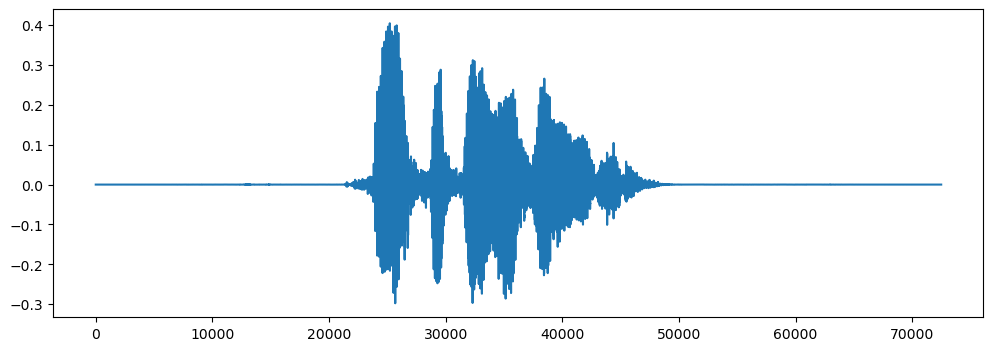

In [68]:
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [69]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [70]:
wave_audio

array([ 0,  0,  0, ..., -2,  1,  0], dtype=int16)

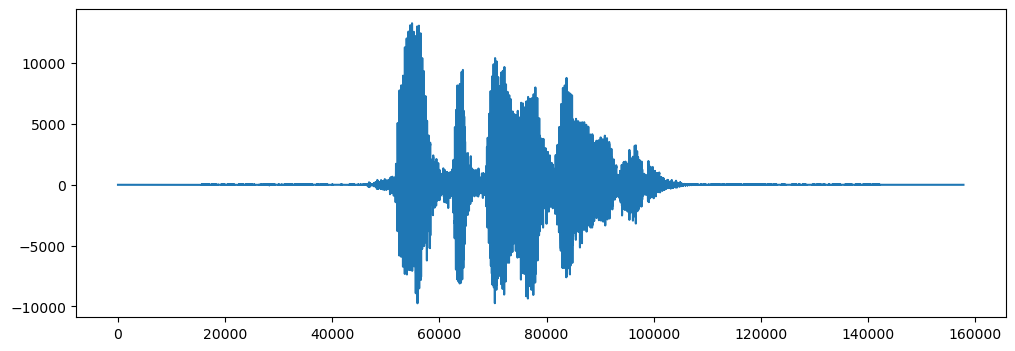

In [71]:
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [ ]:
//mfcc

In [72]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 142)
